In [3]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "20.0.1" 2023-04-18; OpenJDK Runtime Environment Homebrew (build 20.0.1); OpenJDK 64-Bit Server VM Homebrew (build 20.0.1, mixed mode, sharing)
  Starting server from /opt/anaconda3/envs/localds/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/zk/3vgrnry578s2pljd4gcb7f6r0000gn/T/tmpx1rbm1xk
  JVM stdout: /var/folders/zk/3vgrnry578s2pljd4gcb7f6r0000gn/T/tmpx1rbm1xk/h2o_szhuang_started_from_python.out
  JVM stderr: /var/folders/zk/3vgrnry578s2pljd4gcb7f6r0000gn/T/tmpx1rbm1xk/h2o_szhuang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_szhuang_addsht
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [5]:
from h2o.estimators import H2ORandomForestEstimator

In [6]:
# Import the cars dataset into H2O:
cars = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/junit/cars_20mpg.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
cars.head()

name,economy,cylinders,displacement,power,weight,acceleration,year,economy_20mpg
AMC Ambassador Brougham,13,8,360,175,3821,11,73,0
AMC Ambassador DPL,15,8,390,190,3850,8.5,70,0
AMC Ambassador SST,17,8,304,150,3672,11.5,72,0
AMC Concord DL 6,20.2,6,232,90,3265,18.2,79,1
AMC Concord DL,18.1,6,258,120,3410,15.1,78,0
AMC Concord DL,23,4,151,nan,3035,20.5,82,1
AMC Concord,19.4,6,232,90,3210,17.2,78,0
AMC Concord,24.3,4,151,90,3003,20.1,80,1
AMC Gremlin,18,6,232,100,2789,15,73,0
AMC Gremlin,19,6,232,100,2634,13,71,0


In [13]:
# Set the predictors and response;
# set the response as a factor:
cars["economy_20mpg"] = cars["economy_20mpg"].asfactor()
predictors = ["displacement","power","weight","acceleration","year"]
response = "economy_20mpg"

In [14]:
# Split the dataset into a train and valid set:
train, valid = cars.split_frame(ratios=[.8], seed=1234)

In [15]:
# Build and train the model:
model = H2ORandomForestEstimator(ntrees=10, 
                                 max_depth=5, 
                                 min_rows=10,
                                 calibrate_model=True, 
                                 calibration_frame=valid, 
                                 binomial_double_trees=True
                                )

In [19]:
model.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1699115688778_94


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 20                          3075                   3            4            3.75          5             9             7.65

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.06815656358398443
RMSE: 0.26106812058155326
LogLoss: 0.4116804874720808
Mean Per-Class Error: 0.10225247123642846
AUC: 0.9644709123318749
AUCPR: 0.9755198044986828
Gini: 0.9289418246637497

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3815987904866536
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      101  20   0.1653   (20.0/121.0)
1      8    196  0.0392   (8.0/204.0)
Total  109  216  0.0862   (28.0/325.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.381599     0.933333  84
max f2                       0.290556     0.953065  96
max f0point5                 0.7          0.944206  52
max accuracy                 0.381599     0.913846  84
max precision                0.977778     0.991935  7
max recall                   0            1         150
max specificity              1            0.991736  0
max absolute_mcc             0.381599     0.814526  84
max min_per_class_accuracy   0.590909     0.900826  65
max mean_per_class_accuracy  0.642857     0.91057   58
max tns                      1            120       0
max fns                      1            93        0
max fps                      0            121       150
max tps                      0            204       150
max tnr                      1            0.991736  0
max fnr                      1            0.455882  0
max fpr                      0            1         150
max tpr                      0            1         150

Gains/Lift Table: Avg response rate: 62.77 %, avg score: 62.82 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.344615                    1                  1.57891   1.57891            0.991071         1         0.991071                    1                   0.544118        0.544118                   57.8913   57.8913            0.535853
2        0.406154                    0.969103           1.51348   1.569              0.95             0.980343  0.984848                    0.997022            0.0931373       0.637255                   51.348    56.8999            0.620726
3        0.507692                    0.810538           1.49658   1.55452            0.939394         0.914507  0.975758                    0.980519            0.151961        0.789216                   49.6583   55.4516            0.756158
4        0.609231                    0.575107           1.15865   1.48854            0.727273         0.700546  0.934343                    0.933857            0.117647        0.906863                   15.8645   48.8537            0.799425
5        0.710769                    0.262426           0.675876  1.37244            0.424242         0.415196  0.861472                    0.859762            0.0686275       0.97549 

In [21]:
# Eval performance:
perf = model.model_performance()

# Generate predictions on a validation set (if necessary):
pred = model.predict(valid)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [22]:
perf

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.06757643099858107
RMSE: 0.25995467104589803
LogLoss: 0.3156281312864127
Mean Per-Class Error: 0.1055008210180624
AUC: 0.9676929392446634
AUCPR: 0.981528056506375
Gini: 0.9353858784893267

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3817204403414146
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      100  20   0.1667   (20.0/120.0)
1      9    194  0.0443   (9.0/203.0)
Total  109  214  0.0898   (29.0/323.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.38172      0.930456  108
max f2                       0.311111     0.955598  117
max f0point5                 0.818182     0.941307  70
max accuracy                 0.428571     0.910217  106
max precision                1            1         0
max recall                   0            1         169
max specificity              1            1         0
max absolute_mcc             0.38172      0.806296  108
max min_per_class_accuracy   0.6          0.901478  88
max mean_per_class_accuracy  0.650641     0.906609  86
max tns                      1            120       0
max fns                      1            118       0
max fps                      0            120       169
max tps                      0            203       169
max tnr                      1            1         0
max fnr                      1            0.581281  0
max fpr                      0            1         169
max tpr                      0            1         169

Gains/Lift Table: Avg response rate: 62.77 %, avg score: 62.66 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.261538                    1                  1.59314    1.59314            1                1           1                           1                   0.416667        0.416667                   59.3137   59.3137            0.416667
2        0.304615                    0.979417           1.59314    1.59314            1                0.987093    1                           0.998175            0.0686275       0.485294                   59.3137   59.3137            0.485294
3        0.406154                    0.93911            1.54486    1.58107            0.969697         0.962178    0.992424                    0.989176            0.156863        0.642157                   54.486    58.1068            0.633892
4        0.507692                    0.870833           1.49658    1.56417            0.939394         0.906776    0.981818                    0.972696            0.151961        0.794118                   49.6583   56.4171            0.769324
5        0.609231                    0.552754           1.11037    1.48854            0.69697          0.739509    0.934343                    0.933831            0.112745        0.906863                   11.0368   48.8537            0.799425
6        0.710769                    0.255529           0.675876   1.37244            0.424242         0.39771     0.861472                    0.857243            0.0686275       0.97549                    -32.4124  37.2443            0.711027
7        0.818462                    0.0478632          0.0910364  1.20384            0.0571429        0.149539    0.755639                    0.764124            0.00980392      0.985294                   -90.8964  20.3837            0.448104
8        1                        

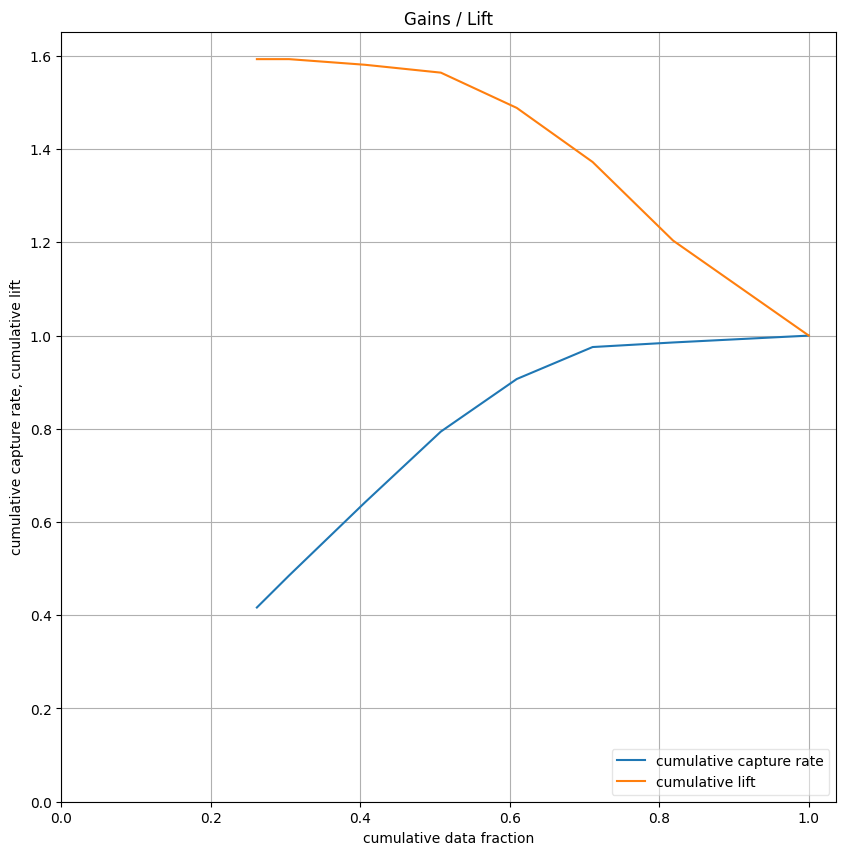

group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.2615385,1.0,1.5931373,1.5931373,1.0,1.0,1.0,1.0,0.4166667,0.4166667,59.3137255,59.3137255,0.4166667
2,0.3046154,0.9794167,1.5931373,1.5931373,1.0,0.9870933,1.0,0.9981748,0.0686275,0.4852941,59.3137255,59.3137255,0.4852941
3,0.4061538,0.9391103,1.5448604,1.5810680,0.9696970,0.9621785,0.9924242,0.9891757,0.1568627,0.6421569,54.4860368,58.1068033,0.6338924
4,0.5076923,0.8708333,1.4965835,1.5641711,0.9393939,0.9067759,0.9818182,0.9726958,0.1519608,0.7941176,49.6583482,56.4171123,0.7693243
5,0.6092308,0.5527540,1.1103684,1.4885373,0.6969697,0.7395089,0.9343434,0.9338313,0.1127451,0.9068627,11.0368390,48.8537334,0.7994247
6,0.7107692,0.2555295,0.6758764,1.3724429,0.4242424,0.3977105,0.8614719,0.8572426,0.0686275,0.9754902,-32.4123589,37.2442917,0.7110274
7,0.8184615,0.0478632,0.0910364,1.2038368,0.0571429,0.1495385,0.7556391,0.7641236,0.0098039,0.9852941,-90.8963585,20.3836798,0.4481040
8,1.0,0.0,0.0810070,1.0,0.0508475,0.0066927,0.6276923,0.6266208,0.0147059,1.0,-91.8993021,0.0,0.0


In [23]:
perf.gains_lift_plot()

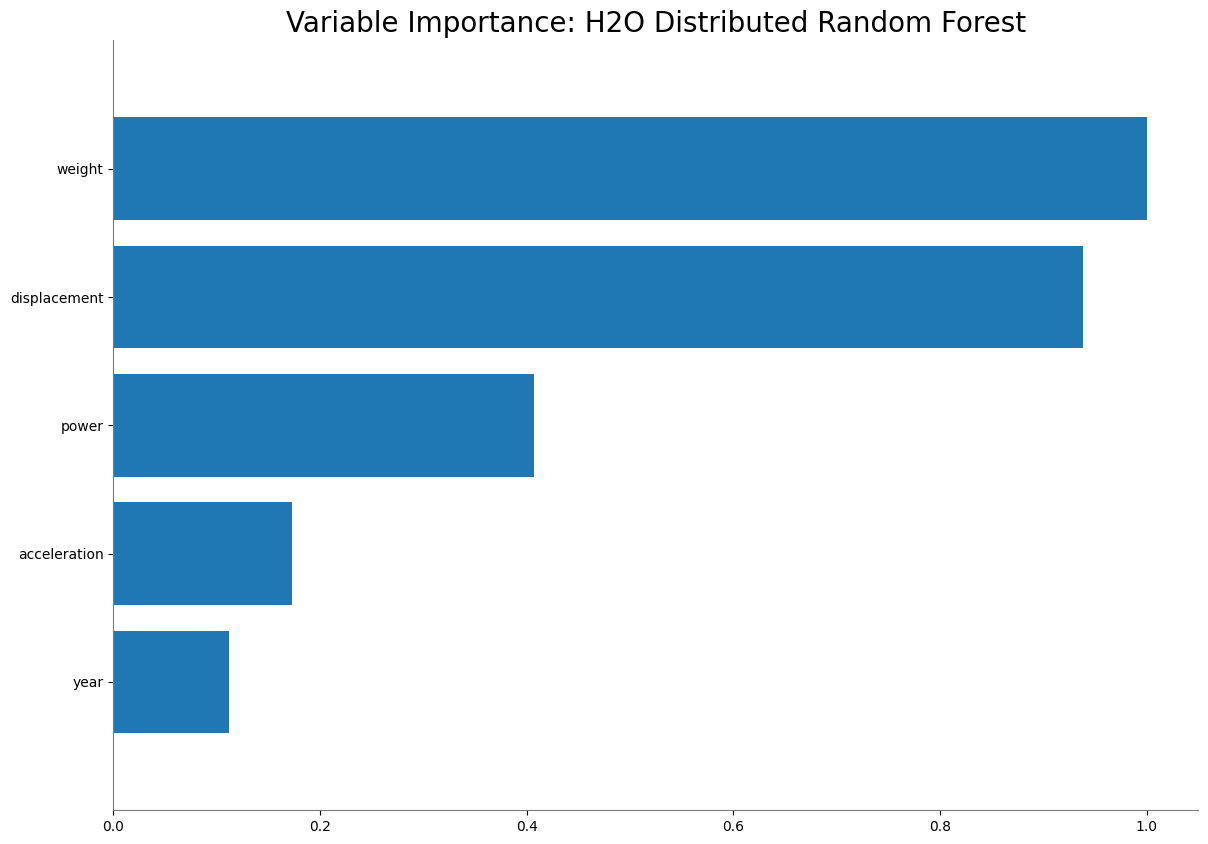

<Figure size 640x480 with 0 Axes>

In [24]:
model.varimp_plot()